In [13]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.signal import butter, filtfilt
import os
import pandas as pd 

In [48]:
s00 = pd.read_csv('../data/archive/s00.csv',header=None)
s01 = pd.read_csv('../data/archive/s01.csv',header=None)
s02 = pd.read_csv('../data/archive/s02.csv',header=None)
s03 = pd.read_csv('../data/archive/s03.csv',header=None)
s04 = pd.read_csv('../data/archive/s04.csv',header=None)
s05 = pd.read_csv('../data/archive/s05.csv',header=None)
s06 = pd.read_csv('../data/archive/s06.csv',header=None)
s07 = pd.read_csv('../data/archive/s07.csv',header=None)
s08 = pd.read_csv('../data/archive/s08.csv',header=None)
s09 = pd.read_csv('../data/archive/s09.csv',header=None)
s10 = pd.read_csv('../data/archive/s10.csv',header=None)
s11 = pd.read_csv('../data/archive/s11.csv',header=None)
s12 = pd.read_csv('../data/archive/s12.csv',header=None)
s13 = pd.read_csv('../data/archive/s13.csv',header=None)
s14 = pd.read_csv('../data/archive/s14.csv',header=None)
s15 = pd.read_csv('../data/archive/s15.csv',header=None)
s16 = pd.read_csv('../data/archive/s16.csv',header=None)
s17 = pd.read_csv('../data/archive/s17.csv',header=None)
s18 = pd.read_csv('../data/archive/s18.csv',header=None)
s19 = pd.read_csv('../data/archive/s19.csv',header=None)
s20 = pd.read_csv('../data/archive/s20.csv',header=None)
s21 = pd.read_csv('../data/archive/s21.csv',header=None)
s22 = pd.read_csv('../data/archive/s22.csv',header=None)
s23 = pd.read_csv('../data/archive/s23.csv',header=None)
s24 = pd.read_csv('../data/archive/s24.csv',header=None)
s25 = pd.read_csv('../data/archive/s25.csv',header=None)
s26 = pd.read_csv('../data/archive/s26.csv',header=None)
s27 = pd.read_csv('../data/archive/s27.csv',header=None)
s28 = pd.read_csv('../data/archive/s28.csv',header=None)
s29 = pd.read_csv('../data/archive/s29.csv',header=None)
s30 = pd.read_csv('../data/archive/s30.csv',header=None)
s31 = pd.read_csv('../data/archive/s31.csv',header=None)
s32 = pd.read_csv('../data/archive/s32.csv',header=None)
s33 = pd.read_csv('../data/archive/s33.csv',header=None)
s34 = pd.read_csv('../data/archive/s34.csv',header=None)
s35 = pd.read_csv('../data/archive/s35.csv',header=None)

In [49]:
# Check single person dataset shape
s00.shape

(31000, 19)

In [50]:
s00=s00.transpose().to_numpy()
s01=s01.transpose().to_numpy()
s02=s02.transpose().to_numpy()
s03=s03.transpose().to_numpy()
s04=s04.transpose().to_numpy()
s05=s05.transpose().to_numpy()
s06=s06.transpose().to_numpy()
s07=s07.transpose().to_numpy()
s08=s08.transpose().to_numpy()
s09=s09.transpose().to_numpy()
s10=s10.transpose().to_numpy()
s11=s11.transpose().to_numpy()
s12=s12.transpose().to_numpy()
s13=s13.transpose().to_numpy()
s14=s14.transpose().to_numpy()
s15=s15.transpose().to_numpy()
s16=s16.transpose().to_numpy()
s17=s17.transpose().to_numpy()
s18=s18.transpose().to_numpy()
s19=s19.transpose().to_numpy()
s20=s20.transpose().to_numpy()
s21=s21.transpose().to_numpy()
s22=s22.transpose().to_numpy()
s23=s23.transpose().to_numpy()
s24=s24.transpose().to_numpy()
s25=s25.transpose().to_numpy()
s26=s26.transpose().to_numpy()
s27=s27.transpose().to_numpy()
s28=s28.transpose().to_numpy()
s29=s29.transpose().to_numpy()
'''s30=s30.transpose().to_numpy()
s31=s31.transpose().to_numpy()
s32=s32.transpose().to_numpy()
s33=s33.transpose().to_numpy()
s34=s34.transpose().to_numpy()
s35=s35.transpose().to_numpy()'''

's30=s30.transpose().to_numpy()\ns31=s31.transpose().to_numpy()\ns32=s32.transpose().to_numpy()\ns33=s33.transpose().to_numpy()\ns34=s34.transpose().to_numpy()\ns35=s35.transpose().to_numpy()'

In [51]:
dataset= np.array([[s00],[s01],[s02],[s03],[s04],[s05],[s06],[s07],
                  [s08],[s09],[s10],[s11],[s12],[s13],[s14],[s15],[s16],[s17],[s18],[s19],
                  [s20],[s21],[s22],[s23],[s24],[s25],[s26],[s27],
                  [s28],[s29]])

In [52]:
dataset.shape

(30, 1, 19, 31000)

In [53]:
seed = 42
tf.random.set_seed(seed)

In [54]:
y=np.array([0,1,1,1,0,1,0,1,1,0,0,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1])
y.size

# 1 for good and 0 for bad

30

In [55]:
# Reshape the dataset
dataset = dataset.reshape(30, 760, 775, 1)

In [60]:
from keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Reshape, LSTM, Dense

# Use the latest, regularized model definition
model = tf.keras.models.Sequential([
    # Input shape MUST be (Height, Width, Channels) for NHWC
    Conv2D(
        filters=16, 
        kernel_size=3, 
        strides=(2,2), 
        activation='relu', 
        input_shape=(760, 775, 1), # <--- THIS IS THE FIX
        padding='same',
        kernel_regularizer=l2(0.001) 
    ),
    MaxPool2D(2, 2),
    BatchNormalization(),
    Dropout(0.5), 
    
    # Reshape calculation for NHWC: (Batch, 190, 194, 16) -> (Batch, 190, 3104)
    Reshape((190, 194 * 16)),
    
    LSTM(64, return_sequences=True),
    LSTM(32),
    
    Dense(1, activation='sigmoid')
])

In [62]:
# Recompile the model
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc', tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.Precision()]
)

model.summary() 

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 380, 388, 16)      160       
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 190, 194, 16)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_77 (Ba  (None, 190, 194, 16)      64        
 tchNormalization)                                               
                                                                 
 dropout_41 (Dropout)        (None, 190, 194, 16)      0         
                                                                 
 reshape_5 (Reshape)         (None, 190, 3104)         0         
                                                                 
 lstm_10 (LSTM)              (None, 190, 64)         

In [63]:
# Run the Model
model.fit(dataset, y, batch_size=1, epochs=15, validation_split=0.25)

Epoch 1/15
22/22 [==============================] - 44s 1s/step - loss: 0.7055 - acc: 0.5000 - recall_6: 0.5000 - auc_6: 0.4955 - precision_6: 0.6364 - val_loss: 0.8581 - val_acc: 0.1250 - val_recall_6: 0.0000e+00 - val_auc_6: 0.1429 - val_precision_6: 0.0000e+00
Epoch 2/15
22/22 [==============================] - 24s 1s/step - loss: 0.3066 - acc: 1.0000 - recall_6: 1.0000 - auc_6: 1.0000 - precision_6: 1.0000 - val_loss: 0.4812 - val_acc: 0.8750 - val_recall_6: 1.0000 - val_auc_6: 0.1429 - val_precision_6: 0.8750
Epoch 3/15
22/22 [==============================] - 25s 1s/step - loss: 0.1125 - acc: 1.0000 - recall_6: 1.0000 - auc_6: 1.0000 - precision_6: 1.0000 - val_loss: 0.4758 - val_acc: 0.8750 - val_recall_6: 1.0000 - val_auc_6: 0.1429 - val_precision_6: 0.8750
Epoch 4/15
22/22 [==============================] - 24s 1s/step - loss: 0.0494 - acc: 1.0000 - recall_6: 1.0000 - auc_6: 1.0000 - precision_6: 1.0000 - val_loss: 0.5974 - val_acc: 0.6250 - val_recall_6: 0.7143 - val_auc_6: 0

In [43]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(dataset, y, test_size=0.25, random_state=42)

y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int) 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_pred))
print("\nValidation Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

1/1 [==============================] - 0s 483ms/step
Validation Accuracy: 0.875

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8


Validation Confusion Matrix:
 [[1 0]
 [1 6]]


In [64]:
# The first line just remind us what are those people's math abilities (1 for good 0 for bad)
y=np.array([0,1,1,1,0,1,0,1,1,0,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ])
y=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])

In [65]:
# Finally, load our testing set
s30=s30.transpose().to_numpy()
s31=s31.transpose().to_numpy()
s32=s32.transpose().to_numpy()
s33=s33.transpose().to_numpy()
s34=s34.transpose().to_numpy()
s35=s35.transpose().to_numpy()

In [66]:
# The predict function as testing
def predict(x):
    test = np.array(s[x]).reshape(1,1,760,775)
    if(model.predict(test)>0.5):
        print("[",x,1,"]")
    else:
        print("[",x,0,"]")

In [67]:
s=[s30,s31,s32,s33,s34,s35]

In [70]:
import threading
t=[None]*6
for i in range(6):
    t[i]=threading.Thread(target=predict, args=(i,))
    t[i].start()
for i in range(6):
    t[i].join()
    
print("Exit")

Exception in thread Thread-10 (predict):
Traceback (most recent call last):
  File "c:\Users\akars\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\akars\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
Exception in thread Thread-11 (predict):
Traceback (most recent call last):
  File "c:\Users\akars\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\akars\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
Exception in thread Thread-9 (predict):
Traceback (most recent call last):
  File "c:\Users\akars\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\akars\AppData\Local\Temp\ipykernel_1524\885239824.py", line 4, in predict
    self._target(*self._args, **self._kwargs)
  File "C:\Users\akars\

Exit


In [71]:
def plot_eeg_group_difference(X, y):
    # Separate EEG data into two groups based on math performance
    X_good = X[y == 1]  # Good math performers
    X_bad = X[y == 0]   # Bad math performers
    
    # Compute the average EEG signal over all channels and subjects for each group
    mean_good = np.mean(X_good, axis=(0, 2))  # Averaged over subjects & channels
    mean_bad = np.mean(X_bad, axis=(0, 2))
    
    # Time axis (assuming time_steps exist)
    time = np.arange(mean_good.shape[0])
    
    # Plot the EEG signal for both groups
    plt.figure(figsize=(10, 5))
    plt.plot(time, mean_good, label='Good Math Performers (y=1)', color='blue')
    plt.plot(time, mean_bad, label='Bad Math Performers (y=0)', color='red', linestyle='dashed')
    
    plt.xlabel('Time Steps')
    plt.ylabel('Mean EEG Signal')
    plt.title('EEG Signal Differences: Good vs. Bad Math Performers')
    plt.legend()
    plt.grid(True)
    plt.show()

In [72]:
dataset_all= np.array([[s00],[s01],[s02],[s03],[s04],[s05],[s06],[s07],
                  [s08],[s09],[s10],[s11],[s12],[s13],[s14],[s15],[s16],[s17],[s18],[s19],
                  [s20],[s21],[s22],[s23],[s24],[s25],[s26],[s27],
                  [s28],[s29],[s30],[s31],[s32],[s33],[s34],[s35]])
dataset_all.shape

(36, 1, 19, 31000)

In [ ]:
factor = 20

def downsample_eeg(data, factor=20):
    num_subjects, num_channels, num_electrodes, num_time_steps = data.shape

    new_time_steps = num_time_steps // factor
    data = data[:, :, :, :new_time_steps * factor]
    
    data = data.reshape(num_subjects, num_channels, num_electrodes, new_time_steps, factor)
    data = np.mean(data, axis=-1)  

    return data

In [ ]:
dataset_all_downsampled = downsample_eeg(dataset_all, factor)

sampling_rate = 500  # Hz
time_per_sample = factor / sampling_rate  # Time duration per downsampled point

X_good = dataset_all_downsampled[y == 1]  
X_bad = dataset_all_downsampled[y == 0]  

num_splits = 10
split_size = dataset_all_downsampled.shape[-1] // num_splits  # 155 time steps per split

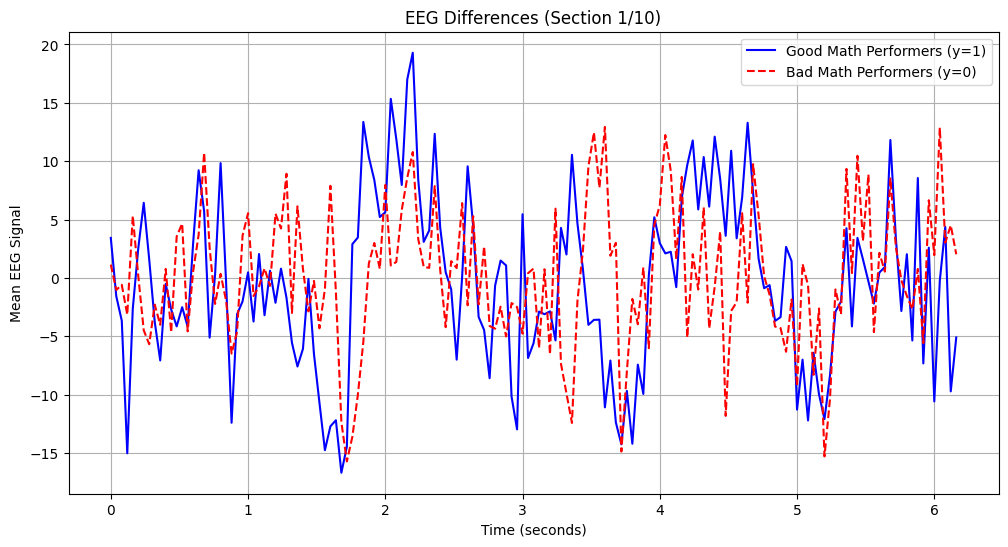

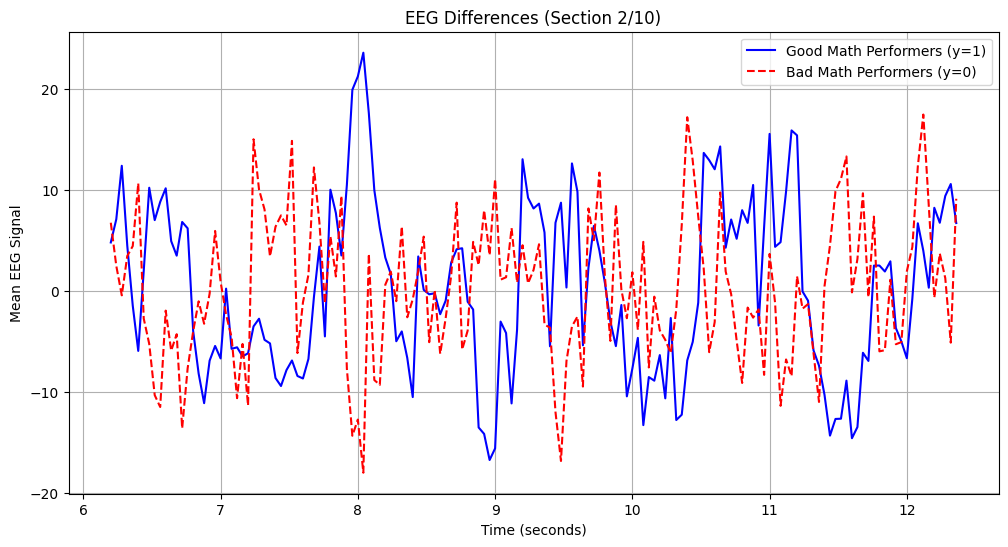

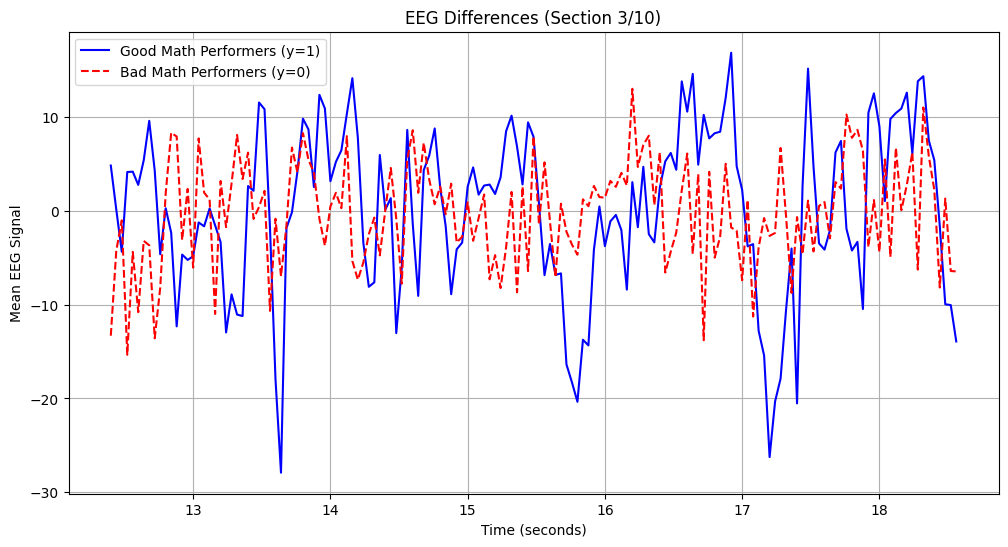

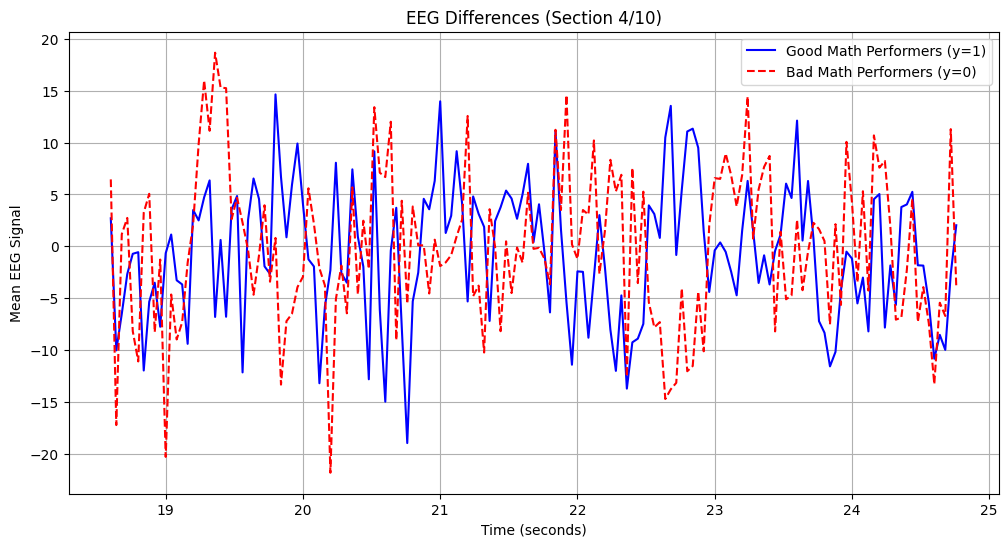

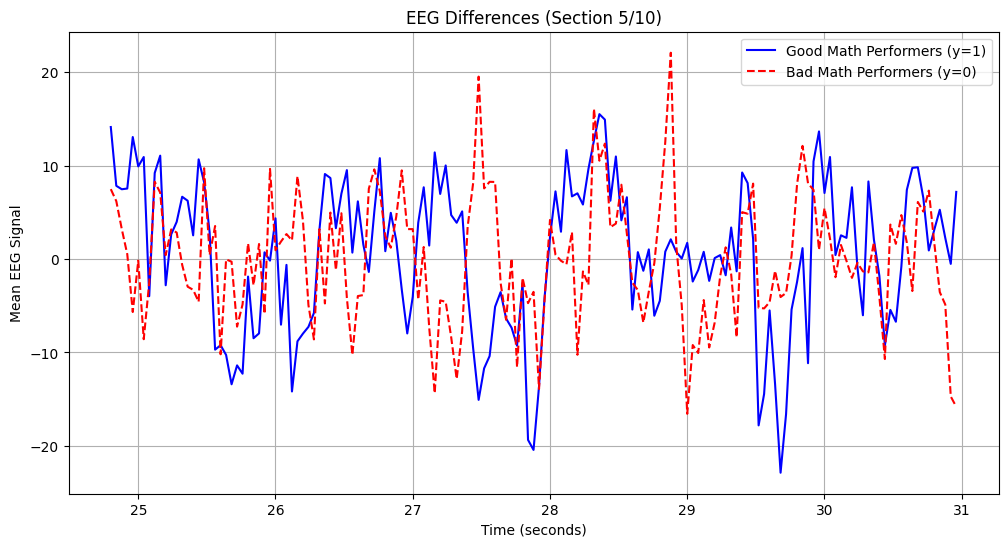

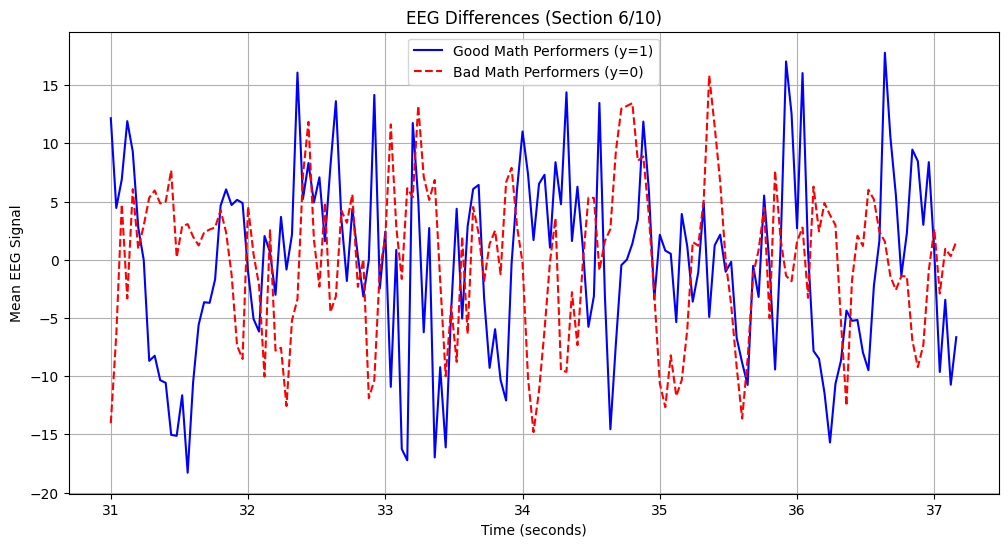

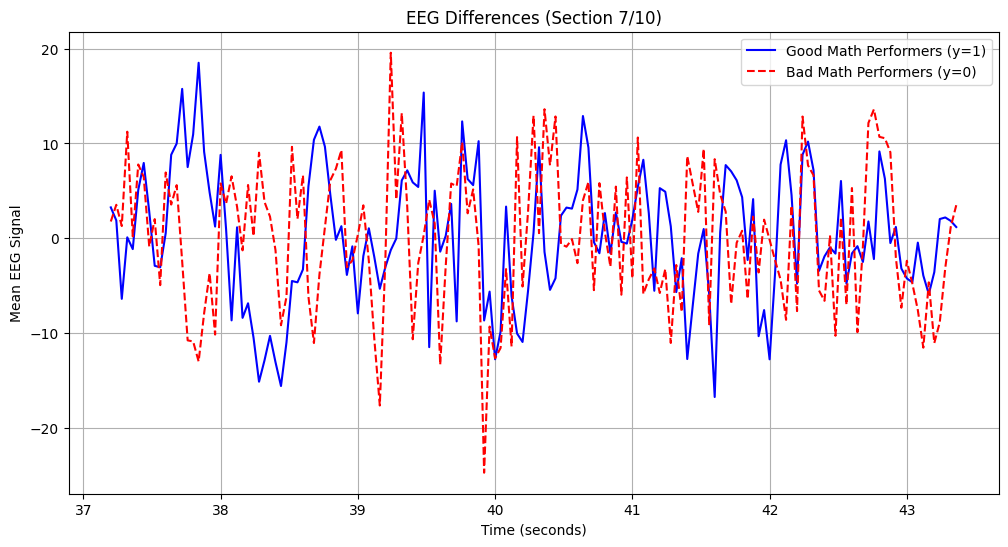

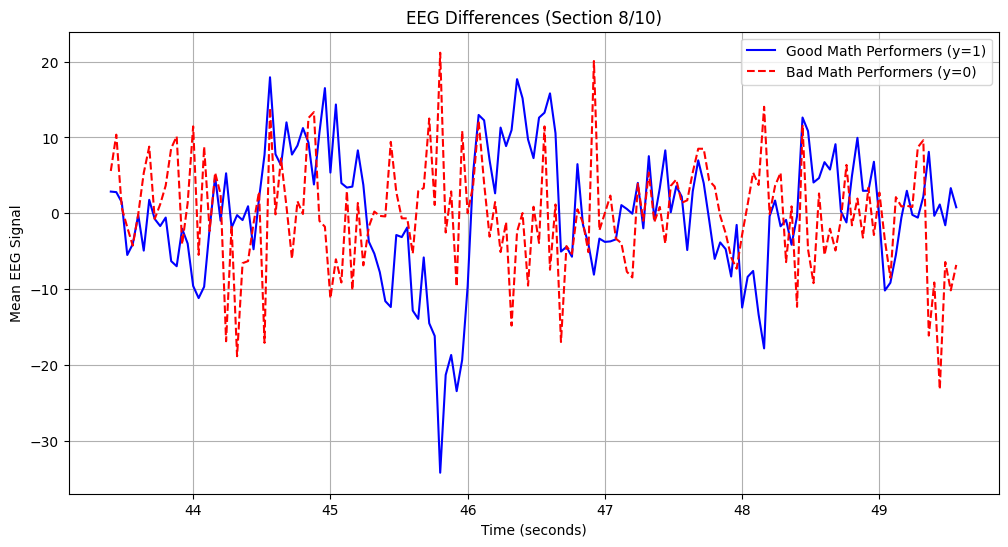

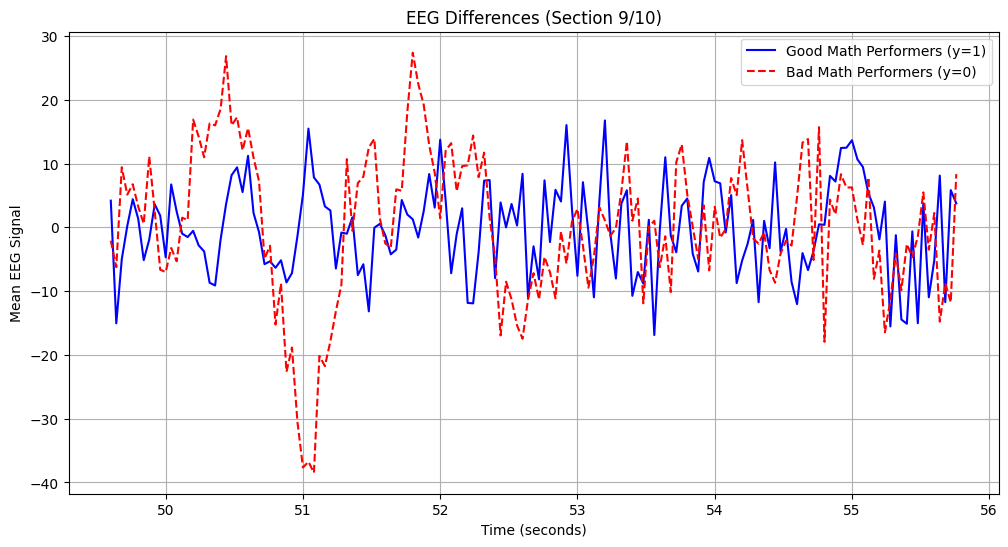

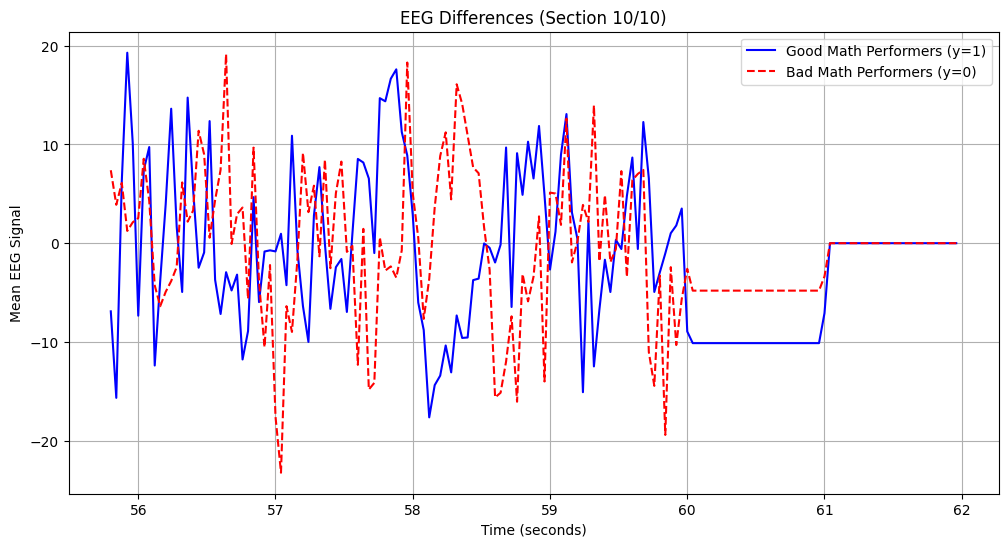

In [76]:
import matplotlib.pyplot as plt
for i in range(num_splits):
    start_idx = i * split_size
    end_idx = (i + 1) * split_size

    section_good = X_good[:, :, :, start_idx:end_idx]
    section_bad = X_bad[:, :, :, start_idx:end_idx]

    mean_good = np.mean(section_good, axis=(0, 2))  # Averaging over subjects & electrodes
    mean_bad = np.mean(section_bad, axis=(0, 2))

    time_axis = np.arange(start_idx, end_idx) * time_per_sample  # Convert indices to actual time

    plt.figure(figsize=(12, 6))  # Increase figure size
    plt.plot(time_axis, mean_good[0], label="Good Math Performers (y=1)", color='blue')
    plt.plot(time_axis, mean_bad[0], label="Bad Math Performers (y=0)", color='red', linestyle='dashed')

    plt.xlabel("Time (seconds)")
    plt.ylabel("Mean EEG Signal")
    plt.title(f"EEG Differences (Section {i+1}/{num_splits})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.pause(2)

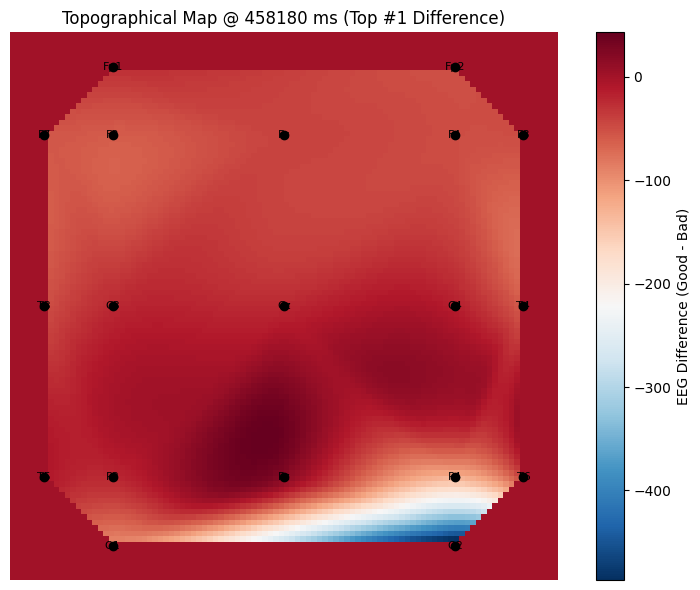

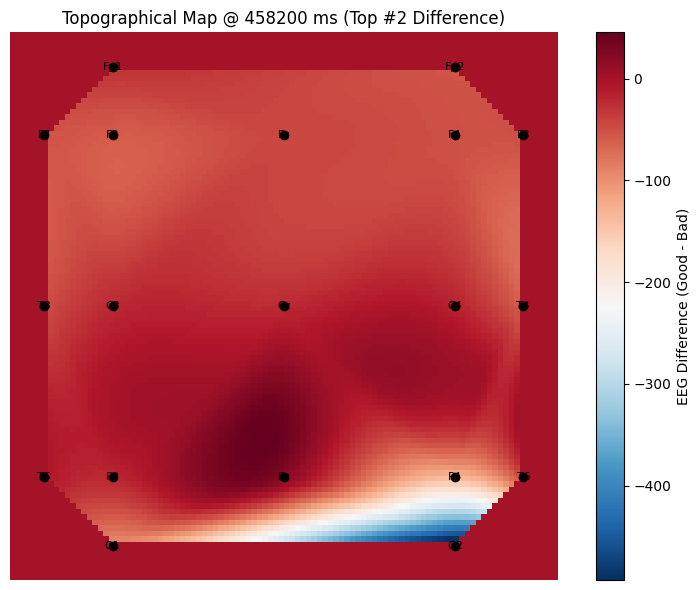

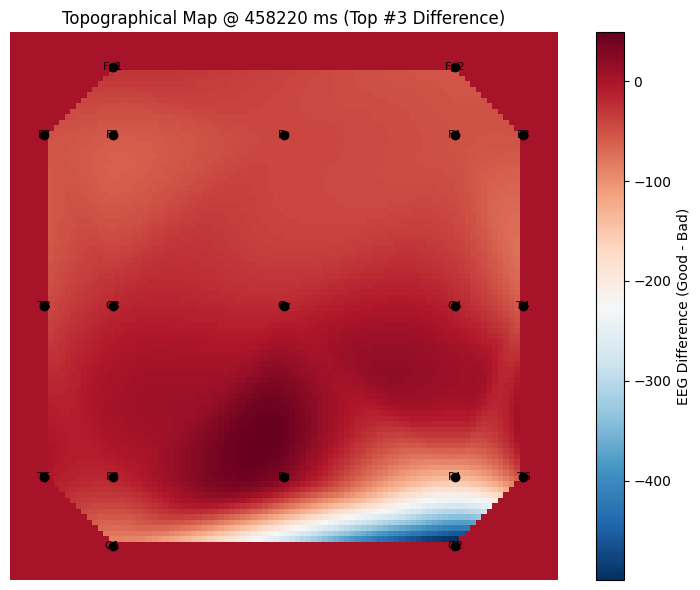

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Channel labels and 2D scalp coordinates
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4',
            'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2',
            'Fz', 'Cz', 'Pz']

channel_pos = {
    'Fp1': (-5.0, 7.0), 'Fp2': (5.0, 7.0), 'F3': (-5.0, 5.0), 'F4': (5.0, 5.0),
    'F7': (-7.0, 5.0), 'F8': (7.0, 5.0), 'T3': (-7.0, 0.0), 'T4': (7.0, 0.0),
    'C3': (-5.0, 0.0), 'C4': (5.0, 0.0), 'T5': (-7.0, -5.0), 'T6': (7.0, -5.0),
    'P3': (-5.0, -5.0), 'P4': (5.0, -5.0), 'O1': (-5.0, -7.0), 'O2': (5.0, -7.0),
    'Fz': (0.0, 5.0), 'Cz': (0.0, 0.0), 'Pz': (0.0, -5.0)
}

# Fix dataset shape
X = np.squeeze(dataset_all)  # Shape: (30, 19, timepoints)
# Separate good and bad performers
X_good = X[y == 1]
X_bad = X[y == 0]

# Mean EEG over subjects
mean_good = np.mean(X_good, axis=0)  # Shape: (channels, timepoints)
mean_bad = np.mean(X_bad, axis=0)

# Absolute difference over time
abs_diff = np.abs(mean_good - mean_bad)
mean_diff_over_time = np.mean(abs_diff, axis=0)

# Top 3 most different timepoints
top_indices = np.argsort(mean_diff_over_time)[-3:]
top_indices = sorted(top_indices.tolist())

sampling_rate = 50  # Adjust if different
timepoints = np.array(top_indices) * (1 / sampling_rate)

# Plot scalp maps at those 3 timepoints
for i, idx in enumerate(top_indices):
    time_label = f"{timepoints[i]*1000:.0f} ms"
    diff = mean_good[:, idx] - mean_bad[:, idx]
    
    x = np.array([channel_pos[ch][0] for ch in channels])
    y_pos = np.array([channel_pos[ch][1] for ch in channels])
    z = diff

    grid_x, grid_y = np.mgrid[-8:8:100j, -8:8:100j]
    grid_z = griddata((x, y_pos), z, (grid_x, grid_y), method='cubic', fill_value=0)

    plt.figure(figsize=(8, 6))
    plt.imshow(grid_z.T, extent=(-8, 8, -8, 8), origin='lower', cmap='RdBu_r')
    plt.colorbar(label='EEG Difference (Good - Bad)')
    plt.scatter(x, y_pos, c='black', label='Electrodes')
    for ch, (x_pos, y_cord) in channel_pos.items():
        plt.text(x_pos, y_cord, ch, fontsize=8, ha='center', va='center')
    plt.title(f'Topographical Map @ {time_label} (Top #{i+1} Difference)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import imageio
import os

sampling_rate = 50  
duration_seconds = 5
frames = duration_seconds * sampling_rate  
output_folder = "eeg_frames"
os.makedirs(output_folder, exist_ok=True)


channels = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4',
            'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2',
            'Fz', 'Cz', 'Pz']

channel_pos = {
    'Fp1': (-5.0, 7.0), 'Fp2': (5.0, 7.0), 'F3': (-5.0, 5.0), 'F4': (5.0, 5.0),
    'F7': (-7.0, 5.0), 'F8': (7.0, 5.0), 'T3': (-7.0, 0.0), 'T4': (7.0, 0.0),
    'C3': (-5.0, 0.0), 'C4': (5.0, 0.0), 'T5': (-7.0, -5.0), 'T6': (7.0, -5.0),
    'P3': (-5.0, -5.0), 'P4': (5.0, -5.0), 'O1': (-5.0, -7.0), 'O2': (5.0, -7.0),
    'Fz': (0.0, 5.0), 'Cz': (0.0, 0.0), 'Pz': (0.0, -5.0)
}
x = np.array([channel_pos[ch][0] for ch in channels])
y_pos = np.array([channel_pos[ch][1] for ch in channels])
grid_x, grid_y = np.mgrid[-8:8:100j, -8:8:100j]


X = np.squeeze(dataset_all)  # Shape: (36, 19, timepoints)
X_good = X[y == 1]
X_bad = X[y == 0]
mean_good = np.mean(X_good, axis=0)  # (19, timepoints)
mean_bad = np.mean(X_bad, axis=0)


image_paths = []
for idx in range(frames):
    eeg_good = mean_good[:, idx]
    eeg_bad = mean_bad[:, idx]

    grid_z_good = griddata((x, y_pos), eeg_good, (grid_x, grid_y), method='cubic', fill_value=np.nan)
    grid_z_bad = griddata((x, y_pos), eeg_bad, (grid_x, grid_y), method='cubic', fill_value=np.nan)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    im0 = axs[0].imshow(grid_z_good.T, extent=(-8, 8, -8, 8), origin='lower', cmap='RdBu_r', vmin=-5, vmax=5)
    axs[0].set_title(f"Good Performers - {idx / sampling_rate:.2f}s")
    axs[0].scatter(x, y_pos, c='black')
    axs[0].axis('off')

    im1 = axs[1].imshow(grid_z_bad.T, extent=(-8, 8, -8, 8), origin='lower', cmap='RdBu_r', vmin=-5, vmax=5)
    axs[1].set_title(f"Bad Performers - {idx / sampling_rate:.2f}s")
    axs[1].scatter(x, y_pos, c='black')
    axs[1].axis('off')

    plt.suptitle(f"EEG Scalp Maps at {idx / sampling_rate:.2f} seconds", fontsize=14)
    plt.tight_layout()

    image_path = f"{output_folder}/frame_{idx:03d}.png"
    plt.savefig(image_path)
    image_paths.append(image_path)
    plt.close()


gif_path = "eeg_scalpmap_dynamic.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.05) as writer:
    for path in image_paths:
        writer.append_data(imageio.imread(path))

print(f"✅ GIF saved to: {gif_path}")

C:\Users\akars\AppData\Local\Temp\ipykernel_1524\3495184786.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(path))


✅ GIF saved to: eeg_scalpmap_dynamic.gif


In [80]:

model_path = '../model/my_cnn_lstm_model.keras' 

try:
    model.save(model_path)
    print(f"✅ Model successfully saved to: {model_path}")
except AttributeError:
    print("Error: The 'model' object is not a valid Keras model or is not defined.")

✅ Model successfully saved to: ../model/my_cnn_lstm_model.keras
